# ------ Bar Plots ------

## ------ 1-> Stacked  -------

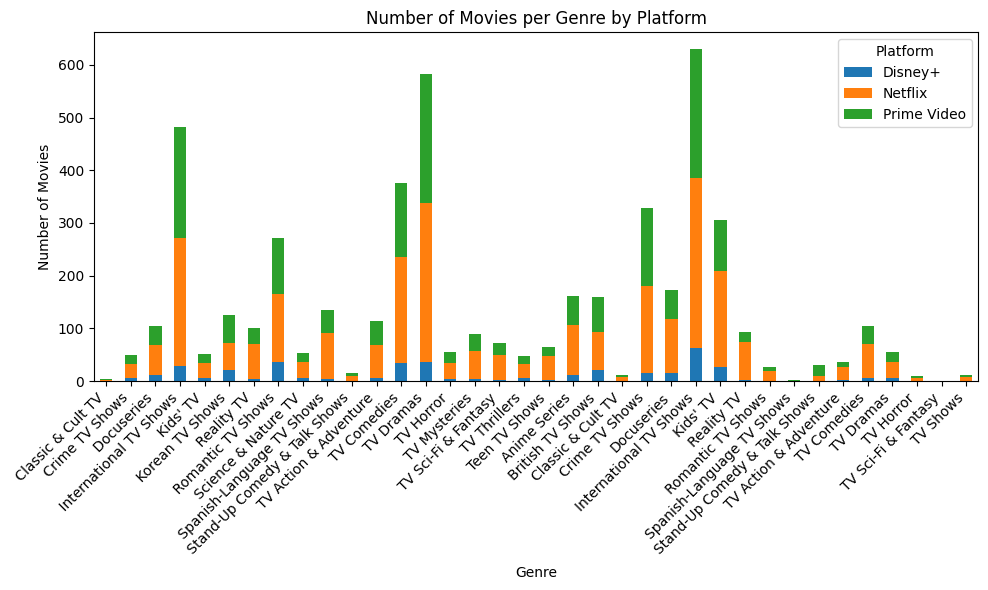

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

cleaned_series_df = pd.read_csv(r'C:\Users\data science\Downloads\GitHub_Repositories\OTT_SUGGESTER\data\clean\clean_combined_series.csv')

cleaned_series_df.rename(columns={'listed_in': 'genre'}, inplace=True)

#cleaned_series_df['genre']

# # Split the genres and stack them into separate rows
# genres_series = cleaned_series_df['genre'].str.split(', ').apply(pd.Series).stack().reset_index(drop=True)

# # Count the occurrences of each genre
# genre_counts = genres_series.value_counts()

# # Print the counts
# print(genre_counts)


# Split the genres and stack them into separate rows
genres_series = cleaned_series_df['genre'].str.split(',').apply(pd.Series).stack().reset_index(drop=True)

# Create a DataFrame combining the genres and platforms
genres_platform_df = pd.concat([genres_series, cleaned_series_df['platform']], axis=1)
genres_platform_df.columns = ['genre', 'platform']

# Count the occurrences of each genre for each platform
genre_platform_counts = genres_platform_df.groupby(['genre', 'platform']).size().unstack(fill_value=0)

# Plot
genre_platform_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Movies per Genre by Platform')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.legend(title='Platform')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

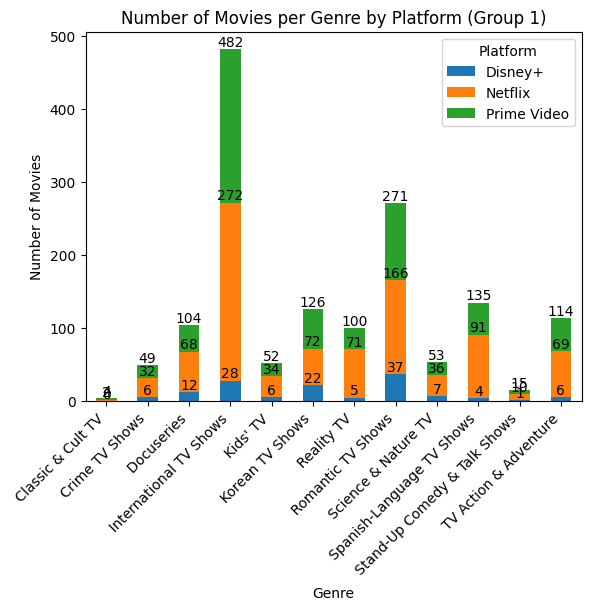

<Figure size 1000x600 with 0 Axes>

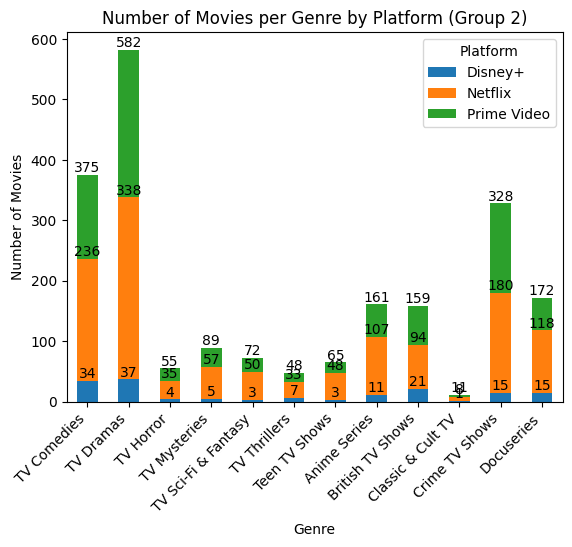

<Figure size 1000x600 with 0 Axes>

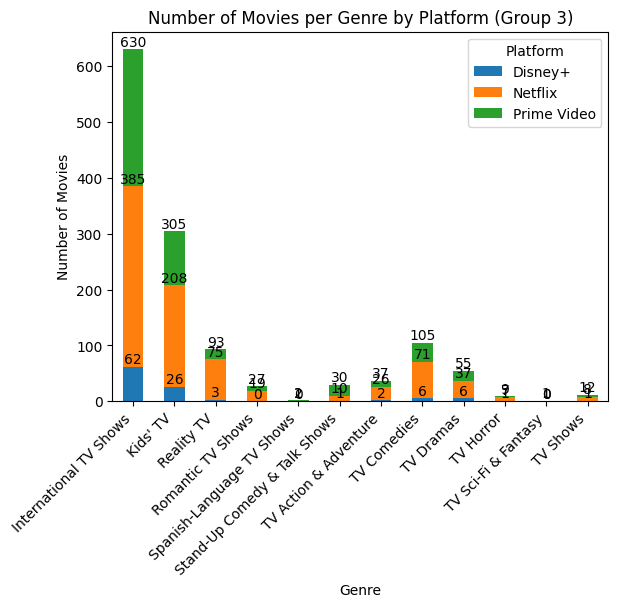

In [79]:
''' Since the Genre column has too many entries, so Split the column in 4 groups/parts and plot each 
                group separately in New figure for better visualization'''

# Plot group 1
plt.figure(figsize=(10, 6))
ax = group1.plot(kind='bar', stacked=True)
plt.title('Number of Movies per Genre by Platform (Group 1)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.legend(title='Platform')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


# Plot group 2
plt.figure(figsize=(10, 6))
ax = group2.plot(kind='bar', stacked=True)
plt.title('Number of Movies per Genre by Platform (Group 2)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.legend(title='Platform')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


# Plot group 3
plt.figure(figsize=(10, 6))
ax = group3.plot(kind='bar', stacked=True)
plt.title('Number of Movies per Genre by Platform (Group 3)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.legend(title='Platform')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

## ------ 2-> Clustered Bar Plot

<Figure size 1000x600 with 0 Axes>

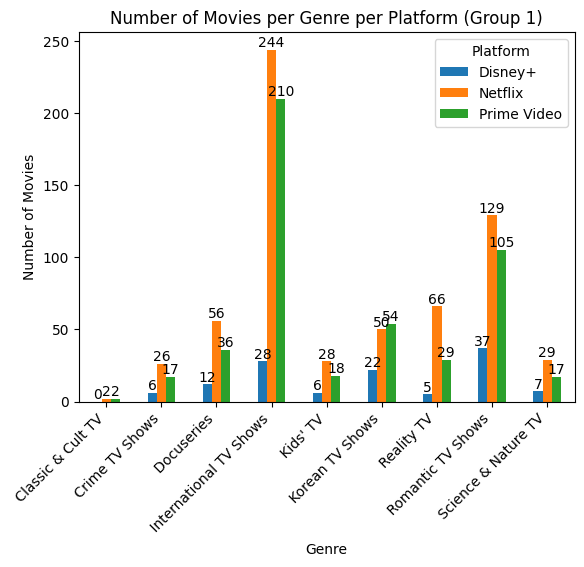

<Figure size 1000x600 with 0 Axes>

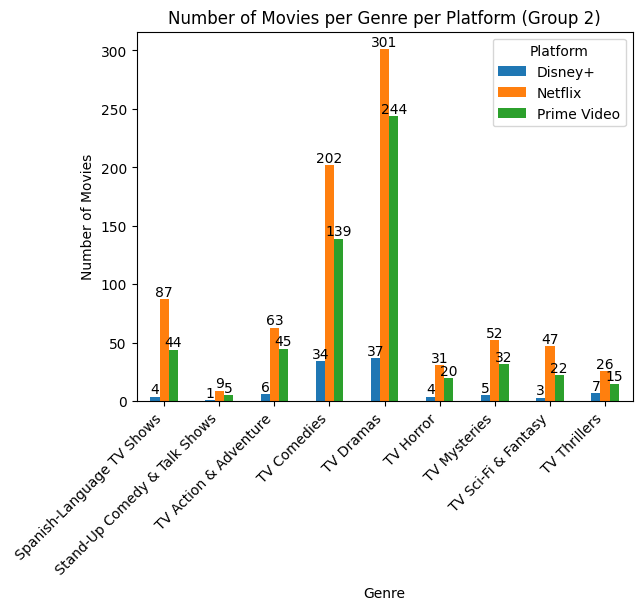

<Figure size 1000x600 with 0 Axes>

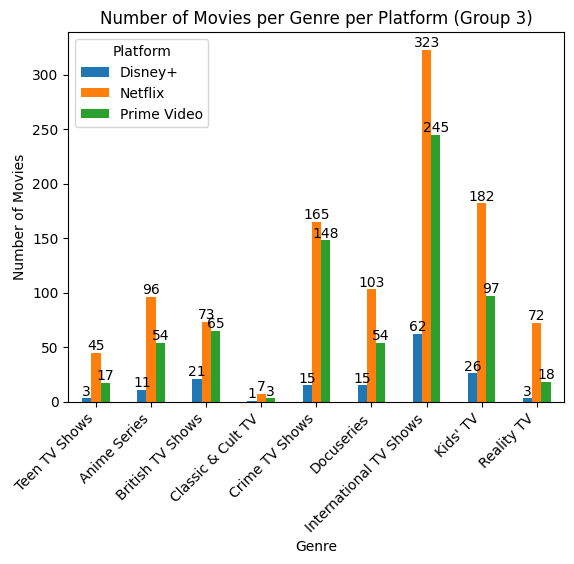

<Figure size 1000x600 with 0 Axes>

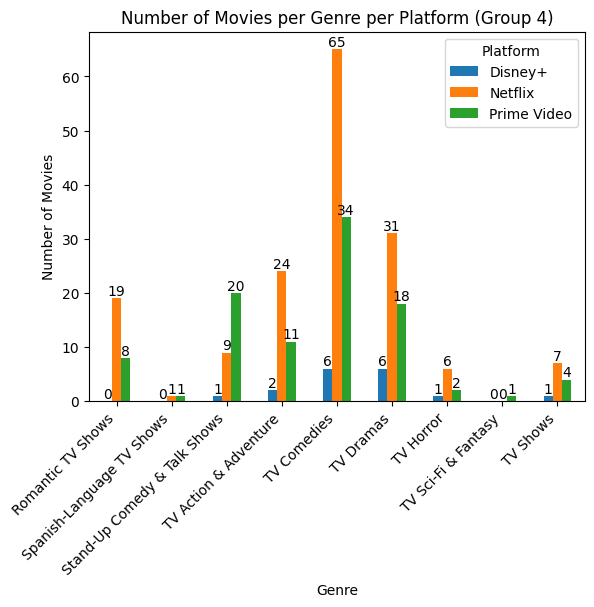

In [82]:
# Split the genres and stack them into separate rows
genres_series = cleaned_series_df['genre'].str.split(',').apply(pd.Series).stack().reset_index(drop=True)

# Create a DataFrame combining the genres and platforms
genres_platform_df = pd.concat([genres_series, cleaned_series_df['platform']], axis=1)
genres_platform_df.columns = ['genre', 'platform']

# Count the occurrences of each genre for each platform
genre_platform_counts = genres_platform_df.groupby(['genre', 'platform']).size().unstack(fill_value=0)

# Calculate the length of each group
group_length = len(genre_platform_counts) // 4

# Split genres into four groups
group1 = genre_platform_counts.iloc[:group_length]
group2 = genre_platform_counts.iloc[group_length:2*group_length]
group3 = genre_platform_counts.iloc[2*group_length:3*group_length]
group4 = genre_platform_counts.iloc[3*group_length:]

# Plot group 1
plt.figure(figsize=(10, 6))
ax = group1.plot(kind='bar', stacked=False)
plt.title('Number of Movies per Genre per Platform (Group 1)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.legend(title='Platform')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

# Plot group 2
plt.figure(figsize=(10, 6))
ax = group2.plot(kind='bar', stacked=False)
plt.title('Number of Movies per Genre per Platform (Group 2)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.legend(title='Platform')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

# Plot group 3
plt.figure(figsize=(10, 6))
ax = group3.plot(kind='bar', stacked=False)
plt.title('Number of Movies per Genre per Platform (Group 3)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.legend(title='Platform')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

# Plot group 4
plt.figure(figsize=(10, 6))
ax = group4.plot(kind='bar', stacked=False)
plt.title('Number of Movies per Genre per Platform (Group 4)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.legend(title='Platform')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

## Using Groupby

### Clustered Bar Plot

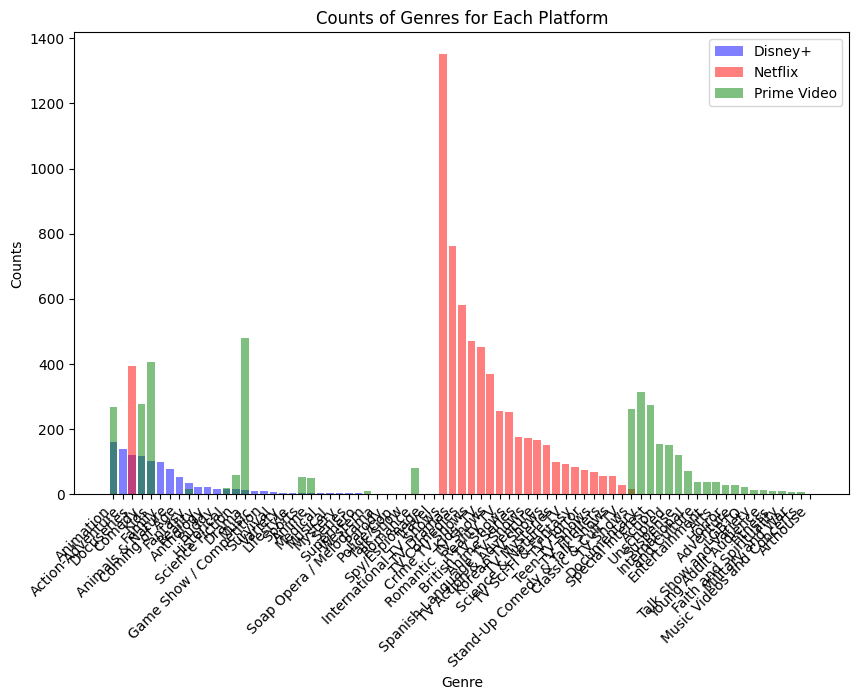

In [83]:
import pandas as pd

group_platform = cleaned_series_df.groupby('platform')

group_platform.first()

# group_platform.head(15)

# cleaned_series_df.info()

disney_counts = group_platform.get_group('Disney+')['genre'].str.split(', ').explode().value_counts()

netflix_counts = group_platform.get_group('Netflix')['genre'].str.split(', ').explode().value_counts()

prime_counts = group_platform.get_group('Prime Video')['genre'].str.split(', ').explode().value_counts()

'''
if len(disney_counts) == len(netflix_counts) == len(prime_counts):
    print('same length')
    
else:
    print('size difference')
    
print(len(disney_counts))
print(len(netflix_counts))
print(len(prime_counts))
'''

# Plot
plt.figure(figsize=(10, 6))

# Plot Disney+
plt.bar(disney_counts.index, disney_counts.values, color='blue', alpha=0.5, label='Disney+')

# Plot Netflix
plt.bar(netflix_counts.index, netflix_counts.values, color='red', alpha=0.5, label='Netflix')

# Plot Prime Video
plt.bar(prime_counts.index, prime_counts.values, color='green', alpha=0.5, label='Prime Video')

plt.title('Counts of Genres for Each Platform')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.legend()
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

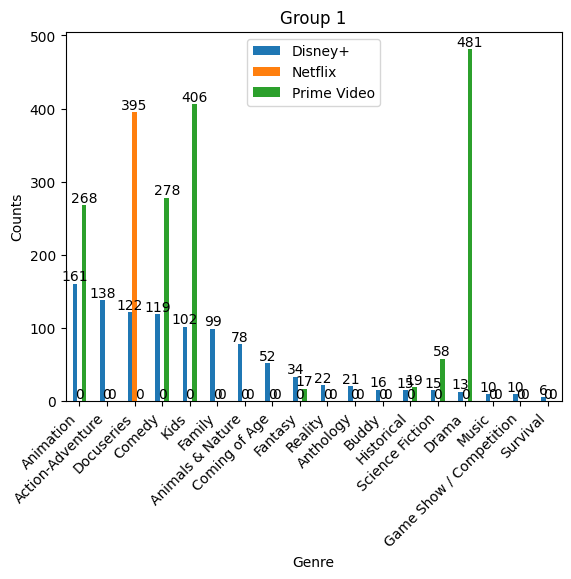

<Figure size 1000x600 with 0 Axes>

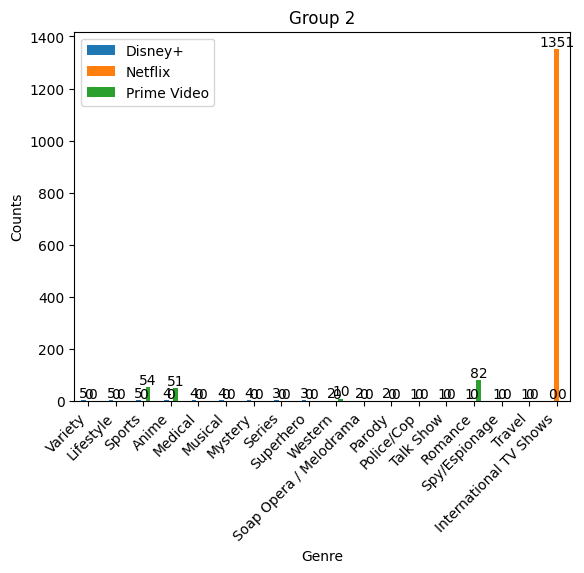

<Figure size 1000x600 with 0 Axes>

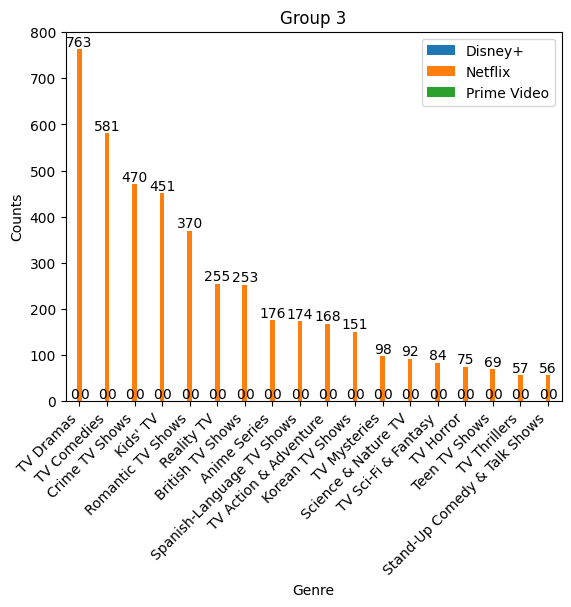

<Figure size 1000x600 with 0 Axes>

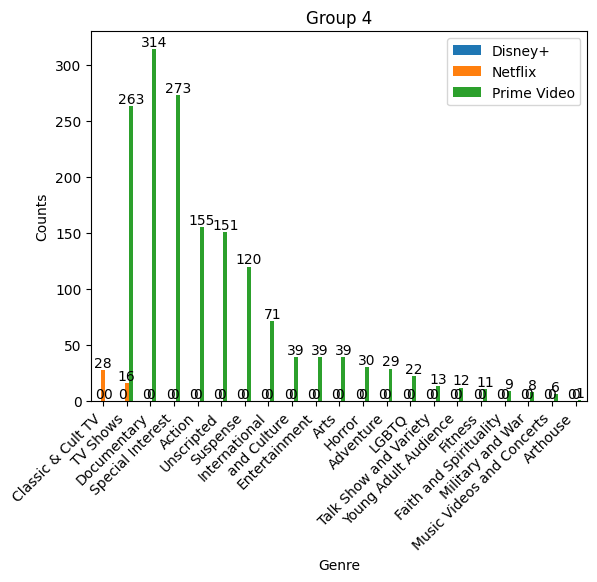

In [86]:

# Divide the genres into four groups
total_counts = pd.concat([disney_counts, netflix_counts, prime_counts], axis=1, keys=['Disney+', 'Netflix', 'Prime Video'])
group_length = len(total_counts) // 4
group1 = total_counts.iloc[:group_length]
group2 = total_counts.iloc[group_length:2*group_length]
group3 = total_counts.iloc[2*group_length:3*group_length]
group4 = total_counts.iloc[3*group_length:]

# Plot group 1
plt.figure(figsize=(10, 6))
ax = group1.plot(kind='bar')
plt.title('Group 1')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

# Plot group 2
plt.figure(figsize=(10, 6))
ax = group2.plot(kind='bar')
plt.title('Group 2')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

# Plot group 3
plt.figure(figsize=(10, 6))
ax = group3.plot(kind='bar')
plt.title('Group 3')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

# Plot group 4
plt.figure(figsize=(10, 6))
ax = group4.plot(kind='bar')
plt.title('Group 4')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

## Approach 3:
### Instead of using explode(), separate the genre in 2 columns